In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
df = pd.read_csv('data/inv_pharma_wIPC.csv')

In [13]:
df.head()

,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12


### Descriptive Analysis 

Remove duplicates due to multiple IPC and author.

In [14]:
df_da = df[['app_nbr','reg_code','prio_year']]
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977
1,EP19780100395,UKJ42,1977
2,EP19780100395,UKJ42,1977
3,EP19780100463,UKJ42,1977
4,EP19780100463,UKJ42,1977


In [15]:
df_da = df_da.drop_duplicates()
df_da.head()

,app_nbr,reg_code,prio_year
0,EP19780100395,UKJ42,1977
3,EP19780100463,UKJ42,1977
11,EP19780100669,UKI22,1977
14,EP19780100690,UKH23,1977
23,EP19780100717,UKI23,1977


In [16]:
print("Before dropping, "+ str(len(df)) +" rows.")
print("After dropping, "+ str(len(df_da)) +" rows.")

Before dropping, 207766 rows.
After dropping, 31282 rows.


In [17]:
# Convert 'prio_year' to integer
df_da['prio_year'] = df_da['prio_year'].astype(int)

# Get the range of years
years = df_da['prio_year'].unique()

# Initialize an empty DataFrame to store the results
results = {}

# Loop over each year
for year in years:
    # Filter the data for the current year
    df_year = df_da[df_da['prio_year'] == year]
    
    # Calculate the total number of patents for each region
    total_patents_per_region = df_year.groupby('reg_code')['app_nbr'].nunique()
    
    # Calculate the total number of patents for the year
    total_patents = df_year['app_nbr'].nunique()
    
    # Get descriptive statistics
    desc_stats = total_patents_per_region.describe()
    
    # Add the total number of patents to the descriptive statistics
    desc_stats = desc_stats.append(pd.Series(total_patents, index=['total_patents']))
    
    # Append the results to the results dictionary
    results[year] = desc_stats

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                    1977        1978        1979        1980        1981  \
count          22.000000   35.000000   36.000000   42.000000   46.000000   
mean            3.727273    5.800000    6.000000    5.428571    6.478261   
std             4.014045    8.463764    8.802597    7.893013    9.052290   
min             1.000000    1.000000    1.000000    1.000000    1.000000   
25%             1.000000    1.000000    1.000000    1.000000    1.000000   
50%             1.500000    2.000000    2.000000    2.000000    3.000000   
75%             5.000000    4.500000    6.250000    5.750000    6.750000   
max            17.000000   36.000000   38.000000   36.000000   43.000000   
total_patents  82.000000  203.000000  216.000000  228.000000  298.000000   

                     1982        1983        1984        1985        1986  \
count           50.000000   56.000000   61.000000   63.000000   75.000000   
mean             5.900000    6.357143    5.901639    6.698413    6.906667   
std     

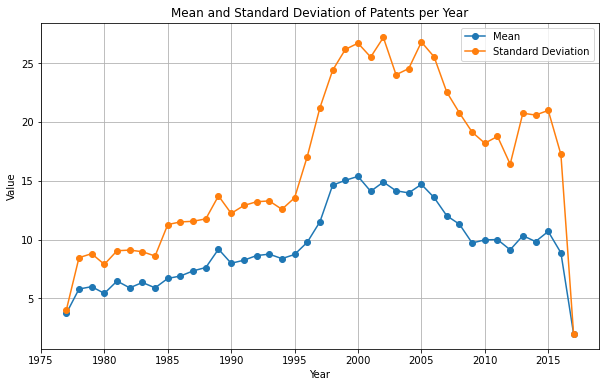

In [11]:
# Plot the count and standard deviation statistics
plt.figure(figsize=(10, 6))
plt.plot(results_df.loc['mean'], marker='o', label='Mean')
plt.plot(results_df.loc['std'], marker='o', label='Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation of Patents per Year')
plt.legend()
plt.grid(True)
plt.savefig('mean&std.png', dpi=300, bbox_inches='tight')
plt.show()

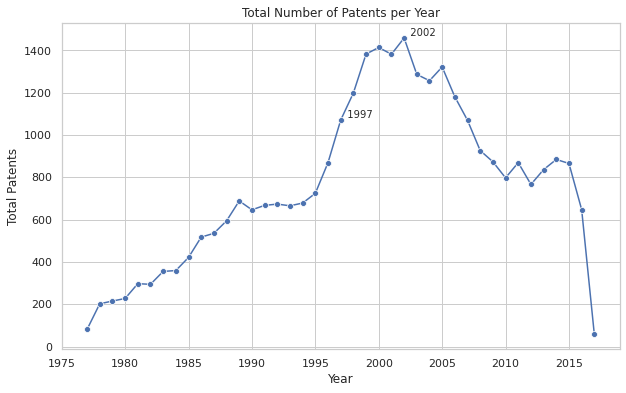

In [18]:
# Calculate the change in total patents compared to the previous year
results_df.loc['change'] = results_df.loc['total_patents'].diff()

# Find the year with the highest total patents
max_patents_year = results_df.loc['total_patents'].idxmax()

# Find the year with the highest change in total patents
max_change_year = results_df.loc['change'].idxmax()

# Plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Total number of patents per year
sns.lineplot(x=results_df.columns, y=results_df.loc['total_patents'], marker='o', ax=ax)

# Add a label for the year with the highest total patents
ax.text(max_patents_year, results_df.loc['total_patents', max_patents_year], f'  {max_patents_year}', verticalalignment='bottom')

# Add a label for the year with the highest change in total patents
ax.text(max_change_year, results_df.loc['total_patents', max_change_year], f'  {max_change_year}', verticalalignment='bottom')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Patents')
ax.set_title('Total Number of Patents per Year')
plt.savefig('Total_Patents.png', dpi=300, bbox_inches='tight')
plt.show()


In [19]:
# Add the change in total patents to results_df
results_df.loc['change'] = results_df.loc['total_patents'].diff()
print(results_df)


                    1977        1978        1979        1980        1981  \
count          22.000000   35.000000   36.000000   42.000000   46.000000   
mean            3.727273    5.800000    6.000000    5.428571    6.478261   
std             4.014045    8.463764    8.802597    7.893013    9.052290   
min             1.000000    1.000000    1.000000    1.000000    1.000000   
25%             1.000000    1.000000    1.000000    1.000000    1.000000   
50%             1.500000    2.000000    2.000000    2.000000    3.000000   
75%             5.000000    4.500000    6.250000    5.750000    6.750000   
max            17.000000   36.000000   38.000000   36.000000   43.000000   
total_patents  82.000000  203.000000  216.000000  228.000000  298.000000   
change               NaN  121.000000   13.000000   12.000000   70.000000   

                     1982        1983        1984        1985        1986  \
count           50.000000   56.000000   61.000000   63.000000   75.000000   
mean     

### Network

In [20]:
G = pd.read_csv('data/Citation_Network.csv')
G.head()

,Citing_app_nbr,Cited_App_nbr
0,EP19790300237,EP19780300148
1,EP19790301143,EP19780100823
2,EP19790301145,EP19780100823
3,EP19790301144,EP19780100823
4,EP19790301142,EP19780100823


In [21]:
citation = pd.read_csv('data/Merged_UK.csv')
citation.head()

,Citing_app_nbr,Cited_App_nbr,IPC_Citing,reg_code_citing,prio_year_citing,IPC_Cited,reg_code_Cited,prio_year_cited
0,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKI23,1977
1,EP19790300237,EP19780300148,A61K031/43,UKI23,1978.0,A61K031/41,UKJ13,1977
2,EP19790301143,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977
3,EP19790301145,EP19780100823,A61K031/415,UKH33,1978.0,A61K,UKJ42,1977
4,EP19790301144,EP19780100823,A61K031/415,UKH23,1978.0,A61K,UKJ42,1977


## Most Influential Patents

In [22]:
import networkx as nx
graph = nx.from_pandas_edgelist(G, source='Citing_app_nbr', target='Cited_App_nbr', create_using=nx.DiGraph())

in_degrees = graph.in_degree()

# Find the node with the highest in-degree
most_cited_node = max(in_degrees, key=lambda x: x[1])

print(f"The most cited patent is {most_cited_node[0]} with {most_cited_node[1]} citations.")


The most cited patent is EP19870302620 with 55 citations.


In [97]:
in_degrees_dict = dict(graph.in_degree())

sorted_nodes = sorted(in_degrees_dict, key=in_degrees_dict.get, reverse=True)

N = 50 
top_nodes = sorted_nodes[:N]

# Get all nodes that are directly connected to the top nodes
connected_nodes = set()
for node in top_nodes:
    connected_nodes.update(graph.predecessors(node))

# Create a subgraph with the top nodes and their connected nodes
G_sub = graph.subgraph(list(connected_nodes))

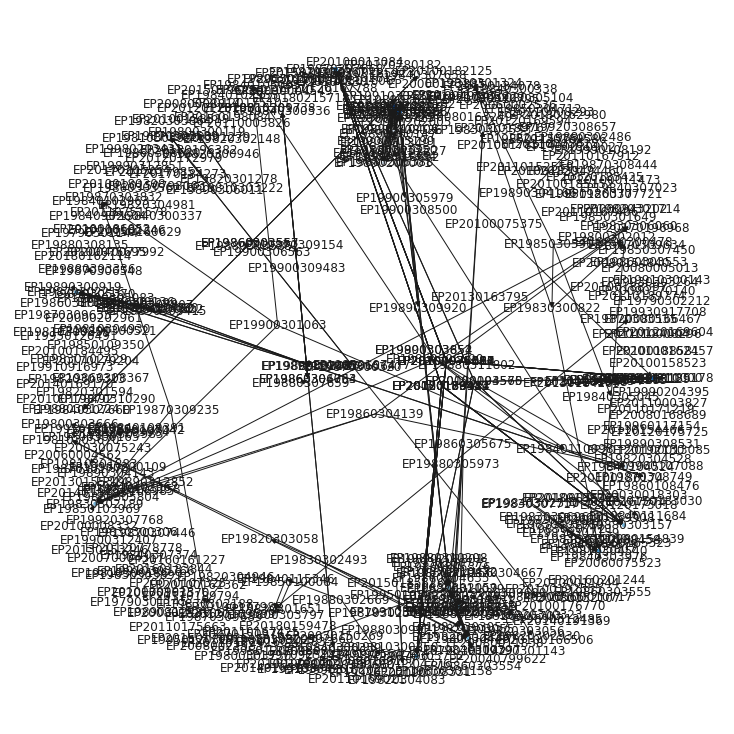

In [98]:
# # Create a color map that is proportional to the in-degrees
# colors = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create a spring layout
pos = nx.spring_layout(G_sub)

plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()

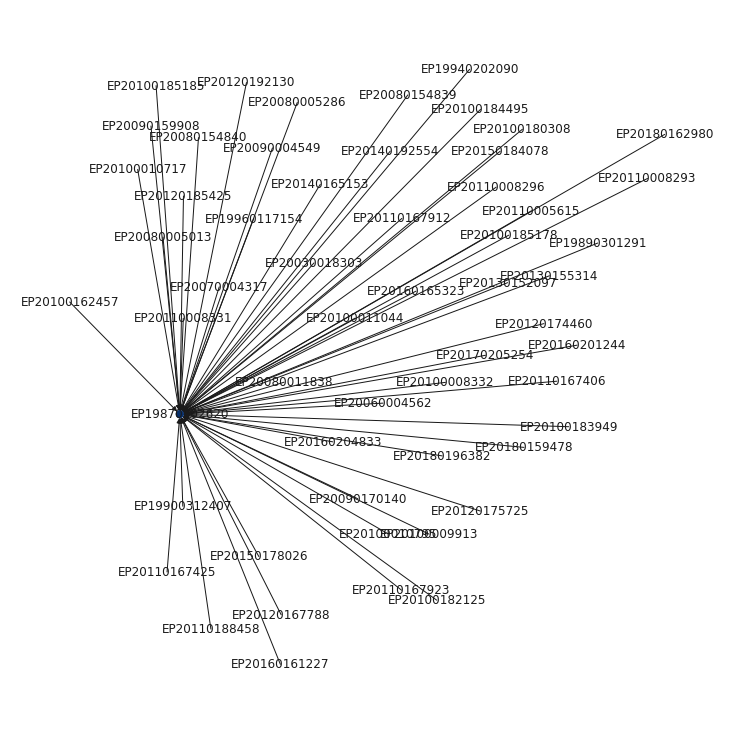

In [84]:
# Identify the node with the highest in-degree
top_node = max(in_degrees_dict, key=in_degrees_dict.get)

# Get all nodes that are directly connected to the top node
connected_nodes = list(graph.predecessors(top_node))

# Add the top node to the list of connected nodes
connected_nodes.append(top_node)

# Create a subgraph with the top node and its connected nodes
G_sub = graph.subgraph(connected_nodes)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_sub = [in_degrees_dict.get(n, 0) for n in G_sub.nodes()]

# Create the plot
plt.figure(figsize=(10, 10))
nx.draw(G_sub, node_size=in_degrees_sub, node_color=in_degrees_sub, with_labels=True, cmap=plt.cm.Blues)
plt.show()


In [99]:
# Convert the directed graph to an undirected graph
G_undirected = graph.to_undirected()
connected_components = nx.connected_components(G_undirected)

# Get the largest connected component (GCC)
GCC = max(connected_components, key=len)

# Create a subgraph with the nodes in the GCC
G_GCC = graph.subgraph(GCC)

# Calculate the in-degrees of the nodes in the subgraph
in_degrees_GCC = [in_degrees_dict.get(n, 0) for n in G_GCC.nodes()]

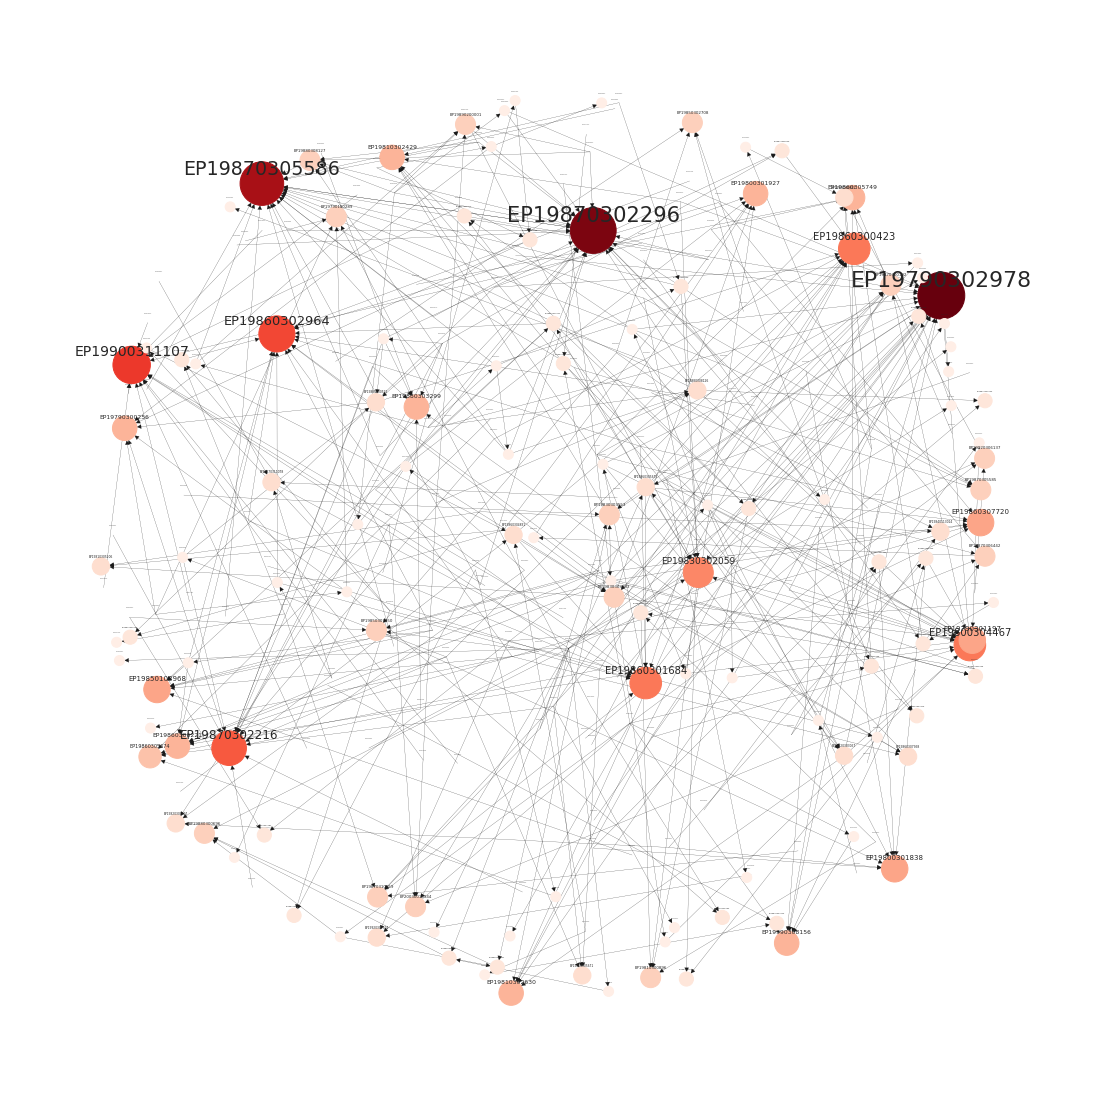

In [110]:
# Normalize the in-degrees for the color map
colors = [(in_degrees_dict.get(n, 0) - min(in_degrees_GCC)) / (max(in_degrees_GCC) - min(in_degrees_GCC)) for n in G_GCC.nodes()]

# Create a spring layout with a larger optimal distance between nodes
pos = nx.spring_layout(G_GCC, k=0.5)

# Create the plot
plt.figure(figsize=(15, 15))
nx.draw(G_GCC, pos, node_size=[i * 100 for i in in_degrees_GCC], node_color=colors, with_labels=False, cmap=plt.cm.Reds, width=0.2)

# Add labels with font size proportional to in-degree
for node, (x, y) in pos.items():
    plt.text(x, y+0.02, s=node, fontsize=in_degrees_dict.get(node, 0), horizontalalignment='center')
plt.savefig('network.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# Convert the in-degrees to a DataFrame
in_degrees_df = pd.DataFrame(in_degrees, columns=['Cited_App_nbr', 'in_degree'])

# Merge the in-degrees DataFrame with location
merged_df = pd.merge(in_degrees_df, citation[['Cited_App_nbr', 'reg_code_Cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
# Select rows where 'in_degree' is not 0
merged_df = merged_df[merged_df['in_degree'] != 0]
merged_df = pd.merge(merged_df, citation[['Cited_App_nbr', 'prio_year_cited']].drop_duplicates(), on='Cited_App_nbr', how='left')
print(merged_df)

      Cited_App_nbr  in_degree reg_code_Cited  prio_year_cited
0     EP19780300148          3          UKI23             1977
1     EP19780300148          3          UKJ13             1977
2     EP19780100823          6          UKJ42             1977
3     EP19790301145          1          UKH33             1978
4     EP19790301142          1          UKH33             1978
...             ...        ...            ...              ...
2336  EP20130789610          1          UKD31             2012
2337  EP20150734640          1          UKG32             2014
2338  EP20150734640          1          UKJ13             2014
2339  EP20150734640          1          UKG13             2014
2340  EP20170717172          1          UKD71             2016

[2341 rows x 4 columns]


In [24]:
merged_df.sort_values(by='in_degree', ascending=False)

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
738,EP19870302620,55,GBZZZ,1986
1356,EP19840301996,26,UKJ33,1983
1354,EP19840301996,26,UKJ11,1983
1355,EP19840301996,26,UKJ13,1983
1365,EP19820300416,22,UKD61,1981
...,...,...,...,...
1140,EP19940302040,1,UKJ23,1993
1139,EP19940301513,1,UKE22,1993
1138,EP19930303360,1,UKD43,1992
1134,EP19900301135,1,UKD63,1989


In [30]:

row = df.loc[df['app_nbr'] == 'EP19870302620']
print(row.head())


             app_nbr    appln_id  person_id              inv_name  \
14088  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14089  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14090  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14091  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14092  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   

                             address reg_code ctry_code  prio_year  app_year  \
14088  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14089  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14090  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14091  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14092  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   

               IPC  
14088  A61K039/395  
14089  C07K014/005  
14090  C07K014/195  
14091   C07K016/00  

In [31]:
import geopandas as gpd

file_path = 'Palma72H/NUTS_RG_20M_2021_3035.shp/NUTS_RG_20M_2021_3035.shp'

gdf = gpd.read_file(file_path)

print(gdf.head())

  NUTS_ID  LEVL_CODE CNTR_CODE     NAME_LATN     NUTS_NAME  MOUNT_TYPE  \
0      FR          0        FR        France        France         0.0   
1      HR          0        HR      Hrvatska      Hrvatska         0.0   
2      HU          0        HU  Magyarország  Magyarország         0.0   
3      AL          0        AL     Shqipëria     Shqipëria         0.0   
4      AT          0        AT    Österreich    Österreich         0.0   

   URBN_TYPE  COAST_TYPE FID  \
0          0           0  FR   
1          0           0  HR   
2          0           0  HU   
3          0           0  AL   
4          0           0  AT   

                                            geometry  
0  MULTIPOLYGON (((9954236.116 -3059379.316, 9961...  
1  MULTIPOLYGON (((4827385.889 2618351.326, 48483...  
2  POLYGON ((5214660.069 2880853.832, 5216710.220...  
3  POLYGON ((5129579.170 2204098.752, 5148385.473...  
4  POLYGON ((4742889.368 2876362.725, 4783217.798...  


In [32]:
# Merge region_citation_counts_df and gdf
merged_gdf = merged_df.merge(gdf, left_on='reg_code_Cited', right_on='NUTS_ID', how='left')

In [33]:
merged_gdf=merged_gdf.dropna(subset=['geometry'])
merged_gdf = merged_gdf.sort_values(by='in_degree', ascending=False)

In [34]:
merged_gdf.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
1355,EP19840301996,26,UKJ13,1983,UKJ13,3.0,UK,Buckinghamshire CC,Buckinghamshire CC,4.0,2.0,2.0,UKJ13,"POLYGON ((3578248.103 3270038.707, 3591887.371..."
1354,EP19840301996,26,UKJ11,1983,UKJ11,3.0,UK,Berkshire,Berkshire,4.0,1.0,2.0,UKJ11,"POLYGON ((3595379.514 3206049.972, 3593621.537..."
56,EP19790302978,22,UKH23,1978,UKH23,3.0,UK,Hertfordshire,Hertfordshire,4.0,1.0,2.0,UKH23,"POLYGON ((3641428.795 3257056.215, 3645219.311..."
1365,EP19820300416,22,UKD61,1981,UKD61,3.0,UK,Warrington,Warrington,4.0,1.0,1.0,UKD61,"POLYGON ((3498804.715 3435082.938, 3492232.692..."
542,EP19870302296,21,UKH23,1986,UKH23,3.0,UK,Hertfordshire,Hertfordshire,4.0,1.0,2.0,UKH23,"POLYGON ((3641428.795 3257056.215, 3645219.311..."


The most cited patent does not have a valid region code. So use the detailed address:

In [35]:

row = df.loc[df['app_nbr'] == 'EP19870302620']
print(row.head())


             app_nbr    appln_id  person_id              inv_name  \
14088  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14089  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14090  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14091  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   
14092  EP19870302620  16679948.0  2639832.0  Winter, Gregory Paul   

                             address reg_code ctry_code  prio_year  app_year  \
14088  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14089  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14090  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14091  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   
14092  64 Cavendish Avenue,Cambridge    GBZZZ        GB       1986      1987   

               IPC  
14088  A61K039/395  
14089  C07K014/005  
14090  C07K014/195  
14091   C07K016/00  

In [25]:
merged_df.to_csv('data/In_dgree.csv', index=False)

## Most Influential Regions

In [36]:
# Group by 'reg_code_cited' and sum the in_dgree
region_citation_counts = merged_df.groupby('reg_code_Cited')['in_degree'].sum()

# Print the result
print(region_citation_counts)

reg_code_Cited
GBZZZ    231
GY000      1
IM000      3
UKC11      5
UKC12      2
        ... 
UKN01      2
UKN02      7
UKN03     28
UKN04      2
UKN05      1
Name: in_degree, Length: 127, dtype: int64


In [37]:
# Convert the series to a DataFrame
region_citation_counts_df = region_citation_counts.reset_index()

# Rename the columns
region_citation_counts_df.columns = ['reg_code_cited', 'Total_Citation_Count']

In [38]:
region_citation_counts_df['reg_code_cited'] = region_citation_counts_df['reg_code_cited'].astype(str)
gdf['NUTS_ID'] = gdf['NUTS_ID'].astype(str)

In [39]:
# Merge region_citation_counts_df and gdf
region_citation_counts_df = region_citation_counts_df.merge(gdf, left_on='reg_code_cited', right_on='NUTS_ID', how='left')

In [40]:
region_citation_counts_df=region_citation_counts_df.dropna(subset=['geometry'])

In [41]:
region_citation_counts_df.head()

,reg_code_cited,Total_Citation_Count,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
3,UKC11,5,UKC11,3.0,UK,Hartlepool and Stockton-on-Tees,Hartlepool and Stockton-on-Tees,4.0,1.0,1.0,UKC11,"POLYGON ((3598172.586 3553993.879, 3597951.864..."
4,UKC12,2,UKC12,3.0,UK,South Teesside,South Teesside,4.0,1.0,1.0,UKC12,"POLYGON ((3625708.122 3546887.147, 3616038.678..."
5,UKC13,3,UKC13,3.0,UK,Darlington,Darlington,4.0,1.0,2.0,UKC13,"POLYGON ((3585028.631 3557236.128, 3583327.063..."
6,UKC14,15,UKC14,3.0,UK,Durham CC,Durham CC,4.0,1.0,1.0,UKC14,"POLYGON ((3582515.806 3590052.703, 3587447.069..."
7,UKC21,7,UKC21,3.0,UK,Northumberland,Northumberland,4.0,2.0,1.0,UKC21,"POLYGON ((3592155.267 3610215.783, 3576388.523..."


In [42]:
import matplotlib.patches as mpatches

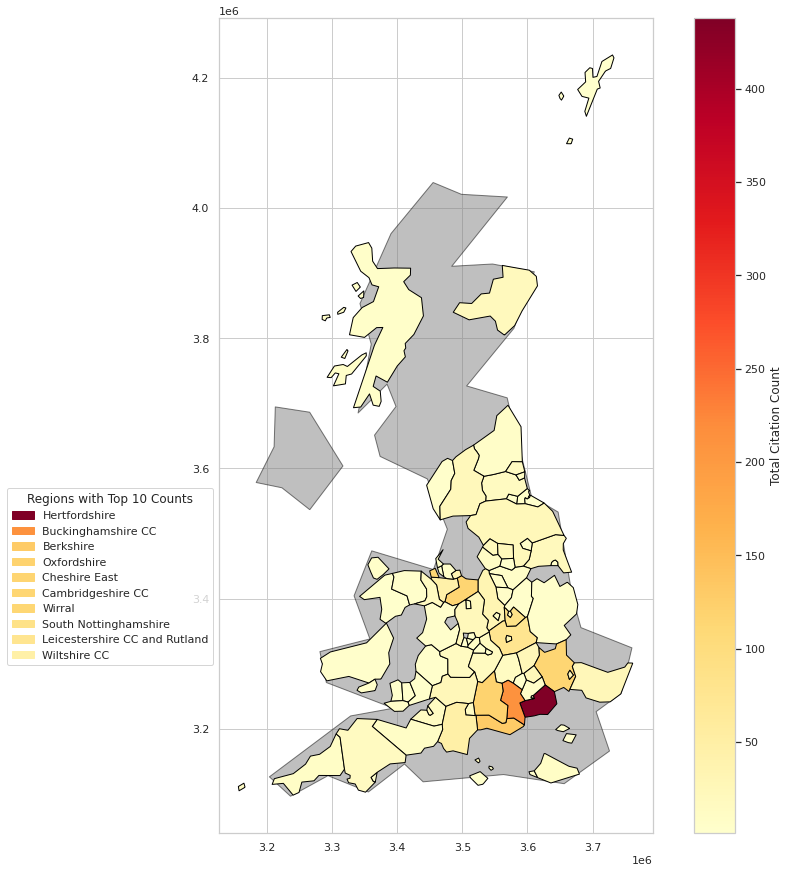

In [46]:
# Load the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the UK
uk = world[world['name'] == 'United Kingdom']
region_citation_counts_df = gpd.GeoDataFrame(region_citation_counts_df, geometry='geometry')

# Make sure the CRS for both GeoDataFrames is the same
uk = uk.to_crs(region_citation_counts_df.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk.plot(ax=ax, color='grey', edgecolor='black', alpha=0.5)

# Add regions to the base map
region_citation_counts_df.plot(ax=base, column='Total_Citation_Count', cmap='YlOrRd', legend=True, legend_kwds={'label': "Total Citation Count", 'orientation': "vertical"}, edgecolor='black')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = region_citation_counts_df.nlargest(10, 'Total_Citation_Count')

# Find the bottom 5 regions
bottom5 = region_citation_counts_df.nsmallest(5, 'Total_Citation_Count')

# Combine top 10 and bottom 5
label_df = pd.concat([top10, bottom5])

# Get the colors of top 10 and bottom 5 regions
top10_colors = top10['Total_Citation_Count']
bottom5_colors = bottom5['Total_Citation_Count']

cmap = plt.get_cmap('YlOrRd')

# Get min and max citation counts for normalization
vmin = region_citation_counts_df['Total_Citation_Count'].min()
vmax = region_citation_counts_df['Total_Citation_Count'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend
for idx, row in top10.iterrows():
    color = cmap((row['Total_Citation_Count'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)

# Add bottom 5 regions to the legend
# for idx, row in bottom5.iterrows():
#     color = cmap((row['Total_Citation_Count'] - vmin) / (vmax - vmin))
#     patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
#     legend_elements.append(patch)

# Create the legend
ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Counts')
# Apply annotation only to top 10 and bottom 5 regions
# label_df.apply(lambda x: ax.annotate(text=x.NUTS_NAME, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

# merged_gdf.apply(lambda x: ax.annotate(text=x.NUTS_NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
plt.savefig('counts_map.png', dpi=300, bbox_inches='tight')

plt.show()

## Self-citation Analysis: a patent cites another patent from the same region -- to understand the extent of local knowledge spillovers.

In [47]:
citation['is_self_citation'] = citation['reg_code_citing'] == citation['reg_code_Cited']

# Calculate the total number of self-citations
total_self_citations = citation['is_self_citation'].sum()

# Calculate the total number of citations
total_citations = len(citation)

# Calculate the proportion of self-citations
proportion_self_citations = total_self_citations / total_citations

print(f"The total number of self-citations is {total_self_citations}.")
print(f"The total number of citations is {total_citations}.")
print(f"The proportion of self-citations is {proportion_self_citations}.")


The total number of self-citations is 1613.
The total number of citations is 6206.
The proportion of self-citations is 0.25990976474379635.


In [48]:
# Group by 'reg_code_citing' and sum the 'is_self_citation' column
self_citations_by_region = citation.groupby('reg_code_citing')['is_self_citation'].sum()
# Convert the Series to a DataFrame
self_citations_by_region_df = self_citations_by_region.reset_index()
# Sort the results in descending order and take the top 5
top5_regions_self_citations = self_citations_by_region.sort_values(ascending=False).head(5)

print(top5_regions_self_citations)


reg_code_citing
UKJ23    259
UKH23    257
UKH33    179
UKJ42    127
UKD74     72
Name: is_self_citation, dtype: int64


In [49]:
self_citations_by_region_df['reg_code_citing'] = self_citations_by_region_df['reg_code_citing'].astype(str)
gdf['NUTS_ID'] = gdf['NUTS_ID'].astype(str)

In [50]:
# Merge self_citations_by_region_df and gdf
self_citations_by_region_df = self_citations_by_region_df.merge(gdf, left_on='reg_code_citing', right_on='NUTS_ID', how='left')

In [51]:
self_citations_by_region_df=self_citations_by_region_df.dropna(subset=['geometry'])

In [52]:
self_citations_by_region_df.sort_values(by='is_self_citation', ascending=False)

,reg_code_citing,is_self_citation,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
51,UKH23,257,UKH23,3.0,UK,Hertfordshire,Hertfordshire,4.0,1.0,2.0,UKH23,"POLYGON ((3641428.795 3257056.215, 3645219.311..."
17,UKD74,72,UKD74,3.0,UK,Wirral,Wirral,4.0,1.0,1.0,UKD74,"POLYGON ((3464414.402 3432207.452, 3452256.064..."
13,UKD62,62,UKD62,3.0,UK,Cheshire East,Cheshire East,4.0,1.0,2.0,UKD62,"POLYGON ((3505602.307 3430511.877, 3510436.925..."
32,UKF16,52,UKF16,3.0,UK,South Nottinghamshire,South Nottinghamshire,4.0,1.0,3.0,UKF16,"POLYGON ((3596988.196 3370946.737, 3582323.090..."
62,UKJ13,48,UKJ13,3.0,UK,Buckinghamshire CC,Buckinghamshire CC,4.0,2.0,2.0,UKJ13,"POLYGON ((3578248.103 3270038.707, 3591887.371..."
...,...,...,...,...,...,...,...,...,...,...,...,...
44,UKG32,0,UKG32,3.0,UK,Solihull,Solihull,4.0,1.0,3.0,UKG32,"POLYGON ((3536607.889 3323429.630, 3535052.070..."
46,UKG38,0,UKG38,3.0,UK,Walsall,Walsall,4.0,1.0,3.0,UKG38,"POLYGON ((3520403.069 3340651.578, 3516672.813..."
49,UKH14,0,UKH14,3.0,UK,Suffolk,Suffolk,4.0,2.0,1.0,UKH14,"MULTIPOLYGON (((3761888.236 3300995.782, 37433..."
53,UKH25,0,UKH25,3.0,UK,Central Bedfordshire,Central Bedfordshire,4.0,1.0,3.0,UKH25,"POLYGON ((3627278.940 3267434.368, 3609193.136..."


In [53]:
row = gdf.loc[gdf['NUTS_ID'] == 'UKJ23']

print(row.head())

Empty GeoDataFrame
Columns: [NUTS_ID, LEVL_CODE, CNTR_CODE, NAME_LATN, NUTS_NAME, MOUNT_TYPE, URBN_TYPE, COAST_TYPE, FID, geometry]
Index: []


The highest self-citation region is missing from the shape file. 
By looking up online:
The region with the code UKJ23 is "West Surrey" in the United Kingdom. This region includes the areas of Elmbridge, Guildford, Runnymede, Spelthorne, Surrey Heath, Waverley, and Woking. 

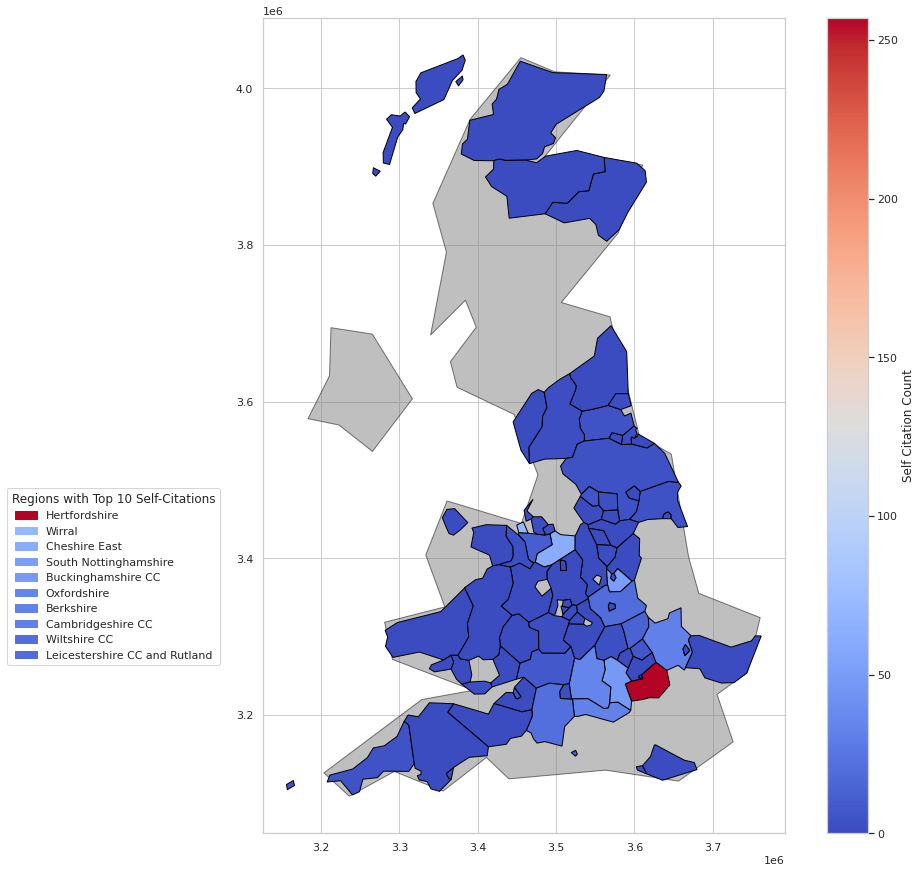

In [58]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the UK
uk = world[world['name'] == 'United Kingdom']
self_citations_by_region_df = gpd.GeoDataFrame(self_citations_by_region_df, geometry='geometry')

# Make sure the CRS for both GeoDataFrames is the same
uk = uk.to_crs(self_citations_by_region_df.crs)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the base map
base = uk.plot(ax=ax, color='grey', edgecolor='black', alpha=0.5)

# Add regions to the base map
self_citations_by_region_df.plot(ax=base, column='is_self_citation', cmap='coolwarm', legend=True, legend_kwds={'label': "Self Citation Count", 'orientation': "vertical"}, edgecolor='black')

# Move the legend to the right
leg = ax.get_legend()

# Label regions
# Find the top 10 regions
top10 = self_citations_by_region_df.nlargest(10, 'is_self_citation')

# Find the bottom 5 regions
bottom5 = self_citations_by_region_df.nsmallest(5, 'is_self_citation')

# Combine top 10 and bottom 5
label_df = pd.concat([top10, bottom5])

# Get the colors of top 10 and bottom 5 regions
top10_colors = top10['is_self_citation']
bottom5_colors = bottom5['is_self_citation']

cmap = plt.get_cmap('coolwarm')

# Get min and max citation counts for normalization
vmin = self_citations_by_region_df['is_self_citation'].min()
vmax = self_citations_by_region_df['is_self_citation'].max()

# Generate legend elements
legend_elements = []

# Add top 10 regions to the legend
for idx, row in top10.iterrows():
    color = cmap((row['is_self_citation'] - vmin) / (vmax - vmin))
    patch = mpatches.Patch(color=color, label=row['NUTS_NAME'])
    legend_elements.append(patch)

# Create the legend
ax.legend(handles=legend_elements, loc='lower left',bbox_to_anchor=(-0.5, 0.2), title='Regions with Top 10 Self-Citations')

plt.savefig('self_citations_map.png', dpi=300, bbox_inches='tight')

plt.show()


In [7]:
from linearmodels import PanelOLS
import statsmodels.api as sm

In [56]:
# df_da = df_da.set_index(['reg_code', 'prio_year'])
# y = df_da['app_nbr']
# X = sm.add_constant(df_da.index.get_level_values('prio_year'))
# model = PanelOLS(y, X, entity_effects=True)
# results = model.fit()
# print(results)

### How diversity might influence the number of citations a patent receives: Shannon's entropy

In [111]:
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited
0,EP19780300148,3,UKI23,1977
1,EP19780300148,3,UKJ13,1977
2,EP19780100823,6,UKJ42,1977
3,EP19790301145,1,UKH33,1978
4,EP19790301142,1,UKH33,1978


In [112]:
df.head()

,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12


In [128]:
df_sh = df[df['app_nbr'].isin(merged_df['Cited_App_nbr'])]

In [120]:
import numpy as np

In [129]:
grouped_ipc = df_sh.groupby('app_nbr')['IPC'].apply(list)

def shannon_entropy(ipc_list):
    frequencies = pd.Series(ipc_list).value_counts(normalize=True)
    return -np.sum(frequencies * np.log(frequencies))

entropy_values = grouped_ipc.apply(shannon_entropy)

entropy_df = entropy_values.reset_index()
entropy_df.columns = ['app_nbr', 'Shannon_Entropy']

df_sh = pd.merge(df_sh, entropy_df, on='app_nbr', how='left')

df_sh.head()


,app_nbr,appln_id,person_id,inv_name,address,reg_code,ctry_code,prio_year,app_year,IPC,Shannon_Entropy
0,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,A61K038/21,1.098612
1,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C07K014/555,1.098612
2,EP19780100395,16427449.0,2214748.0,"Johnston, Michael Denis","16 Altyre Way,Beckenham Kent",UKJ42,GB,1977,1978,C12P021/00,1.098612
3,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61K038/00,2.079442
4,EP19780100463,16427512.0,2214885.0,"Wilkinson, Samuel","12 Bevington Road,Beckenham, Kent",UKJ42,GB,1977,1978,A61P001/12,2.079442


In [137]:
print(entropy_df['Shannon_Entropy'].isna().sum())

0


In [130]:
merged_df = pd.merge(merged_df, entropy_df, left_on='Cited_App_nbr', right_on='app_nbr', how='left')

In [131]:
merged_df = merged_df.drop(['app_nbr'], axis=1)
merged_df.head()

,Cited_App_nbr,in_degree,reg_code_Cited,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,UKI23,1977,2.302585
1,EP19780300148,3,UKJ13,1977,2.302585
2,EP19780100823,6,UKJ42,1977,2.995732
3,EP19790301145,1,UKH33,1978,2.079442
4,EP19790301142,1,UKH33,1978,1.945910


In [132]:
counts_entropy = merged_df.drop(['reg_code_Cited'], axis = 1)
counts_entropy = counts_entropy.drop_duplicates()
counts_entropy.head()

,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
2,EP19780100823,6,1977,2.995732
3,EP19790301145,1,1978,2.079442
4,EP19790301142,1,1978,1.945910
5,EP19790301557,1,1978,1.386294


In [ ]:
# Some patents in merged_df is not in df_sh
print(counts_entropy['Shannon_Entropy'].isna().sum())

595


In [154]:
# Extract rows where 'Shannon_Entropy' is null
null_entropy = counts_entropy[counts_entropy['Shannon_Entropy'].isnull()]
exists = null_entropy['Cited_App_nbr'].isin(citation['Cited_App_nbr'])
print(exists.value_counts())


True    595
Name: Cited_App_nbr, dtype: int64


In [158]:
cite_entro = citation[citation['Cited_App_nbr'].isin(null_entropy['Cited_App_nbr'])]
cite_entro = cite_entro[['Cited_App_nbr','IPC_Cited']]
cite_entro = cite_entro.drop_duplicates()
cite_entro.head()

,Cited_App_nbr,IPC_Cited
209,EP19810303256,C07J041/00
317,EP19800303328,G01N033/53
339,EP19810109184,B01J027/125
486,EP19820301322,C07H019/06
522,EP19810305206,C07C 213/00


In [159]:
len(cite_entro)

595

In [160]:
grouped_ipc_citation = cite_entro.groupby('Cited_App_nbr')['IPC_Cited'].apply(list)

entropy_values_citation = grouped_ipc_citation.apply(shannon_entropy)

entropy_df_citation = entropy_values_citation.reset_index()
entropy_df_citation.columns = ['Cited_App_nbr', 'Shannon_Entropy']
entropy_df_citation.head()

,Cited_App_nbr,Shannon_Entropy
0,EP19790901156,-0.0
1,EP19800303143,-0.0
2,EP19800303328,-0.0
3,EP19800303457,-0.0
4,EP19800303992,-0.0


In [161]:
counts_entropy.set_index('Cited_App_nbr', inplace=True)
entropy_df_citation.set_index('Cited_App_nbr', inplace=True)
counts_entropy['Shannon_Entropy'].update(entropy_df_citation['Shannon_Entropy'])

counts_entropy.reset_index(inplace=True)
entropy_df_citation.reset_index(inplace=True)

counts_entropy.head()


,Cited_App_nbr,in_degree,prio_year_cited,Shannon_Entropy
0,EP19780300148,3,1977,2.302585
1,EP19780100823,6,1977,2.995732
2,EP19790301145,1,1978,2.079442
3,EP19790301142,1,1978,1.945910
4,EP19790301557,1,1978,1.386294


In [162]:
print(counts_entropy['Shannon_Entropy'].isna().sum())

0


In [163]:
counts_entropy.to_csv('Counts_Entropy.csv', index=False)

In [164]:
import statsmodels.api as sm

X = counts_entropy['Shannon_Entropy']
y = counts_entropy['in_degree']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              in_degree   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     93.61
Date:                Mon, 10 Jul 2023   Prob (F-statistic):           1.37e-21
Time:                        17:28:30   Log-Likelihood:                -3840.5
No. Observations:                1703   AIC:                             7685.
Df Residuals:                    1701   BIC:                             7696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2278      0.080     

# statistically significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. 

1. The coefficient for Shannon Entropy is 0.4979: for each unit increase in Shannon Entropy, the number of citations a patent receives increases by about 0.498. This result is statistically significant, as the p-value is less than 0.05.

2. The R-squared value is 0.052: only about 5.2% of the variation in the number of citations a patent receives can be explained by its Shannon Entropy. While there is a significant relationship, there are likely other factors not included in this model that also have an impact on the number of citations a patent receives.

3. The residuals: not normally distributed --- the Omnibus test p-value is close to 0, and there is a high degree of skewness and kurtosis. Potentially violate the assumptions of the OLS regression model and may impact the reliability of the results. 

4. The results suggest that the diversity of IPC codes in a patent does have a significant positive effect on the number of citations it receives, but the model explains only a small portion of the variation in the number of citations. Identify more other factors that could explain more of this variation.

# Other factors:

1. **Research and Development (R&D) Expenditure**: The amount of money invested in R&D can significantly influence the number of patents: OECD.

2. **Government Policies and Regulations**

3. **Economic Factors**: GDP growth: World Bank, OECD.

4. **Scientific Progress and Technological Change**: The number of scientific publications in related fields.

5. **Education and Human Capital**: The number of graduates in relevant fields, the number of researchers working in the pharmaceutical industry.